# 过拟合和欠拟合

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

1.12.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

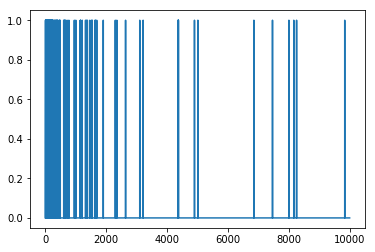

In [3]:
plt.plot(train_data[1])

In [4]:
test=[[0,1,2],[3,4,5]]

In [11]:
for i,j in enumerate(test):
    print(i)
    print(j)

0
[0, 1, 2]
1
[3, 4, 5]


In [12]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5136 - acc: 0.7884 - binary_crossentropy: 0.5136 - val_loss: 0.3563 - val_acc: 0.8704 - val_binary_crossentropy: 0.3563
Epoch 2/20
 - 3s - loss: 0.2616 - acc: 0.9064 - binary_crossentropy: 0.2616 - val_loss: 0.2852 - val_acc: 0.8874 - val_binary_crossentropy: 0.2852
Epoch 3/20
 - 3s - loss: 0.1900 - acc: 0.9336 - binary_crossentropy: 0.1900 - val_loss: 0.2861 - val_acc: 0.8865 - val_binary_crossentropy: 0.2861
Epoch 4/20
 - 3s - loss: 0.1518 - acc: 0.9475 - binary_crossentropy: 0.1518 - val_loss: 0.3070 - val_acc: 0.8804 - val_binary_crossentropy: 0.3070
Epoch 5/20
 - 3s - loss: 0.1250 - acc: 0.9587 - binary_crossentropy: 0.1250 - val_loss: 0.3318 - val_acc: 0.8748 - val_binary_crossentropy: 0.3318
Epoch 6/20
 - 3s - loss: 0.1019 - acc: 0.9686 - binary_crossentropy: 0.1019 - val_loss: 0.3629 - val_acc: 0.8715 - val_binary_crossentropy: 0.3629
Epoch 7/20
 - 3s - loss: 0.0817 - acc: 0.9767 - binary_crossentropy:

In [14]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [15]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5534 - acc: 0.7816 - binary_crossentropy: 0.5534 - val_loss: 0.4357 - val_acc: 0.8619 - val_binary_crossentropy: 0.4357
Epoch 2/20
 - 3s - loss: 0.3463 - acc: 0.8931 - binary_crossentropy: 0.3463 - val_loss: 0.3396 - val_acc: 0.8783 - val_binary_crossentropy: 0.3396
Epoch 3/20
 - 3s - loss: 0.2641 - acc: 0.9163 - binary_crossentropy: 0.2641 - val_loss: 0.3014 - val_acc: 0.8866 - val_binary_crossentropy: 0.3014
Epoch 4/20
 - 3s - loss: 0.2190 - acc: 0.9302 - binary_crossentropy: 0.2190 - val_loss: 0.2882 - val_acc: 0.8880 - val_binary_crossentropy: 0.2882
Epoch 5/20
 - 3s - loss: 0.1896 - acc: 0.9395 - binary_crossentropy: 0.1896 - val_loss: 0.2862 - val_acc: 0.8858 - val_binary_crossentropy: 0.2862
Epoch 6/20
 - 3s - loss: 0.1675 - acc: 0.9458 - binary_crossentropy: 0.1675 - val_loss: 0.2863 - val_acc: 0.8862 - val_binary_crossentropy: 0.2863
Epoch 7/20
 - 3s - loss: 0.1498 - acc: 0.9530 - binary_crossentropy:

In [16]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [17]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 10s - loss: 0.3405 - acc: 0.8560 - binary_crossentropy: 0.3405 - val_loss: 0.2954 - val_acc: 0.8796 - val_binary_crossentropy: 0.2954
Epoch 2/20
 - 10s - loss: 0.1315 - acc: 0.9524 - binary_crossentropy: 0.1315 - val_loss: 0.3612 - val_acc: 0.8634 - val_binary_crossentropy: 0.3612
Epoch 3/20
 - 10s - loss: 0.0391 - acc: 0.9888 - binary_crossentropy: 0.0391 - val_loss: 0.4417 - val_acc: 0.8691 - val_binary_crossentropy: 0.4417
Epoch 4/20
 - 10s - loss: 0.0061 - acc: 0.9990 - binary_crossentropy: 0.0061 - val_loss: 0.5868 - val_acc: 0.8696 - val_binary_crossentropy: 0.5868
Epoch 5/20
 - 10s - loss: 8.5895e-04 - acc: 1.0000 - binary_crossentropy: 8.5895e-04 - val_loss: 0.6824 - val_acc: 0.8718 - val_binary_crossentropy: 0.6824
Epoch 6/20
 - 10s - loss: 2.1731e-04 - acc: 1.0000 - binary_crossentropy: 2.1731e-04 - val_loss: 0.7225 - val_acc: 0.8715 - val_binary_crossentropy: 0.7225
Epoch 7/20
 - 10s - loss: 1.2602e-04 - acc: 1.

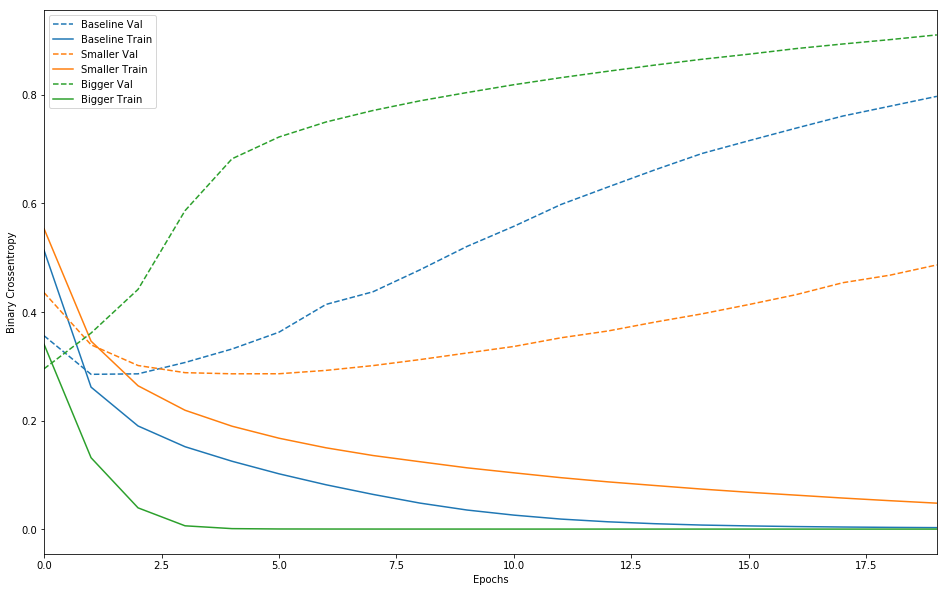

In [18]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])

plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])